# Data Analysis with LLMs

We are going to create an Agent With LangChain that using the OpenAI API, will be able to analyze the data contained in an Excel file.

It will be able to find relationships between variables, clean the data, search for a model, and execute it to make future predictions.

In summary, it will act as a Data Scientist Assistant, helping us in our day-to-day tasks.

## Intalling and importing libraries

In [1]:
!pip install -q langchain==0.1.2
!pip install -q langchain_experimental==0.0.49
!pip install -q langchain-openai==0.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.6/803.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.1/269.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

We use the **os** library to store Environ variables. Like OPENAI_API_KEY.

Get you OpenAI API  Key: https://platform.openai.com/

In [2]:
import os
import openai
from google.colab import userdata

api_key = userdata.get("open_ai")

# Set the API key as an environment variable
os.environ["OPENAI_API_KEY"] = api_key

## Loading the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install kaggle

In [5]:
import os
#This directory should contain you kaggle.json file with you key
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [6]:
!kaggle datasets download -d goyaladi/climate-insights-dataset

  0% 0.00/791k [00:00<?, ?B/s]
100% 791k/791k [00:00<00:00, 110MB/s]


In [7]:

import zipfile

# Define the path to your zip file
file_path = '/content/climate-insights-dataset.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')


We are using a kaggle Dataset:
https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset

You can download the CSV. Feel free to use the Dataset you are more interested In, or your own Data.




In [8]:
import pandas as pd
csv_file='/content/drive/MyDrive/kaggle/climate_change_data.csv'
#creating the document with Pandas.
document = pd.read_csv(csv_file)

In [9]:
document.head(5)

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [ ]:
#If you want to use your own CSV just execute this Cell
#from google.colab import files

#def load_csv_file():
#  """Loads a CSV file into a Pandas dataframe."""

#  uploaded_file = files.upload()
#  file_path = next(iter(uploaded_file))
#  document = pd.read_csv(file_path)
#  return document

#if __name__ == "__main__":
#  document = load_csv_file()
#  print(document)

# Creating the Agent
This is the easiest Agent we can create with LangChain, we only need to import the **create_pandas_dataframe_agent**.

Time to create our little assistant, and we need only a call.

We let **OpenAI** decide which model to use. However, we specify a **temperature** value of 0 to its parameter, so that it is not imaginative. This is much better when we want the model to be able to give commands to the different libraries it can use.



In [10]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

from langchain_openai import ChatOpenAI
from langchain_openai import OpenAI

In [11]:
llm = ChatOpenAI(model="gpt-4", temperature=0)
sm_ds_OAI = create_pandas_dataframe_agent(
    llm,
    document,
    verbose=True
)

## First Question.

In [12]:
sm_ds_OAI.invoke("Analyze this data, and write a brief explanation around 100 words.")



> Entering new AgentExecutor chain...
Thought: To analyze this data, I need to understand the structure and content of the dataframe. I can see that it contains information about different weather and environmental factors in different locations and countries at different dates. The factors include temperature, CO2 emissions, sea level rise, precipitation, humidity, and wind speed. I can use the describe() function to get a statistical summary of the dataframe.
Action: python_repl_ast
Action Input: df.describe()
Observation:         Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332   

{'input': 'Analyze this data, and write a brief explanation around 100 words.',
 'output': 'The dataframe contains 10,000 records of weather and environmental data from different locations and countries. The data includes temperature, CO2 emissions, sea level rise, precipitation, humidity, and wind speed. The average temperature is approximately 14.94 degrees with a moderate variation. CO2 emissions average around 400.22 with a significant variation. The sea level rise has a mean close to 0, but with a wide spread of values. Precipitation, humidity, and wind speed also show a wide range of values. This data could be used to analyze the relationship between these environmental factors.'}

In [13]:
document.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


The description of the data made by the Agent is acurated.

## Second Question.

In [14]:
sm_ds_OAI.run("Do you think is possible to forecast the temperature?")


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: To forecast the temperature, we would need to have a time series data. In this case, we do have a 'Date' column which suggests that this data could potentially be used for forecasting. However, the ability to accurately forecast the temperature would depend on the nature of the data, the presence of any trends or patterns, and the application of appropriate forecasting models. It's also important to note that forecasting is a complex task that involves a lot of uncertainty and potential for error, even when using sophisticated models and large amounts of data.
Final Answer: Yes, it is possible to forecast the temperature using this data, but the accuracy of the forecast would depend on various factors including the nature of the data and the forecasting model used.

> Finished chain.


'Yes, it is possible to forecast the temperature using this data, but the accuracy of the forecast would depend on various factors including the nature of the data and the forecasting model used.'

The model thinks that is possible to forecast the temperature, but difficult because the weak correlation between variables.



> Entering new AgentExecutor chain...
Thought: To visualize the data, we can use various plots like line plot, scatter plot, histogram, etc. For time series data like this, line plots are often useful. We can plot Temperature, CO2 Emissions, Sea Level Rise, Precipitation, Humidity, and Wind Speed over time to see their trends. We can also plot scatter plots to see the relationship between Temperature and other variables. However, as this is a text-based environment, I can't actually generate the plots here. I can only provide the code to do so.
Action: python_repl_ast
Action Input: 
```python
# Import necessary libraries
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Plot Temperature over time
plt.figure(figsize=(10,6))
plt.plot(df['Temperature'])
plt.title('Temperature over time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

# Plot CO2 Emissions over

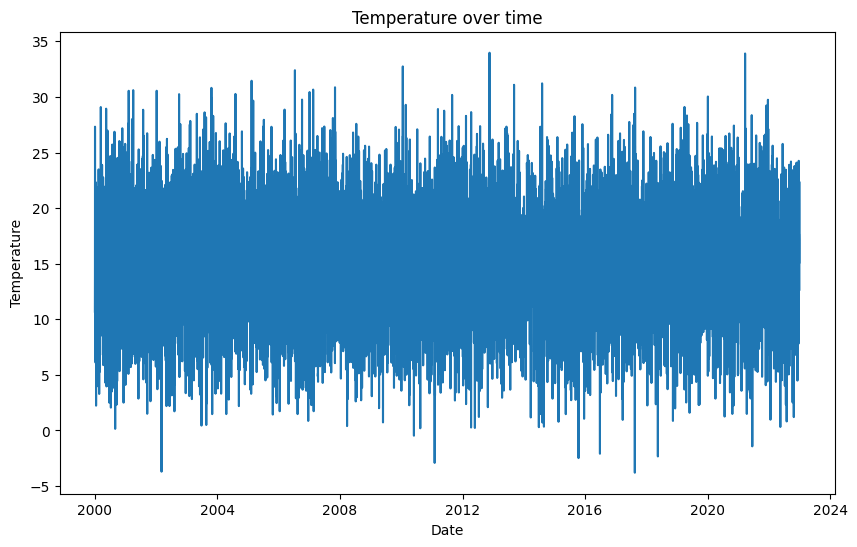

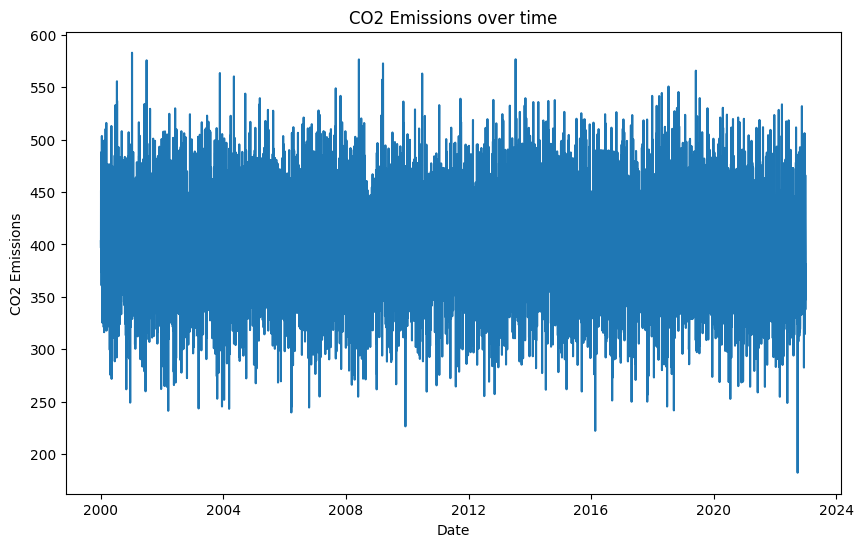

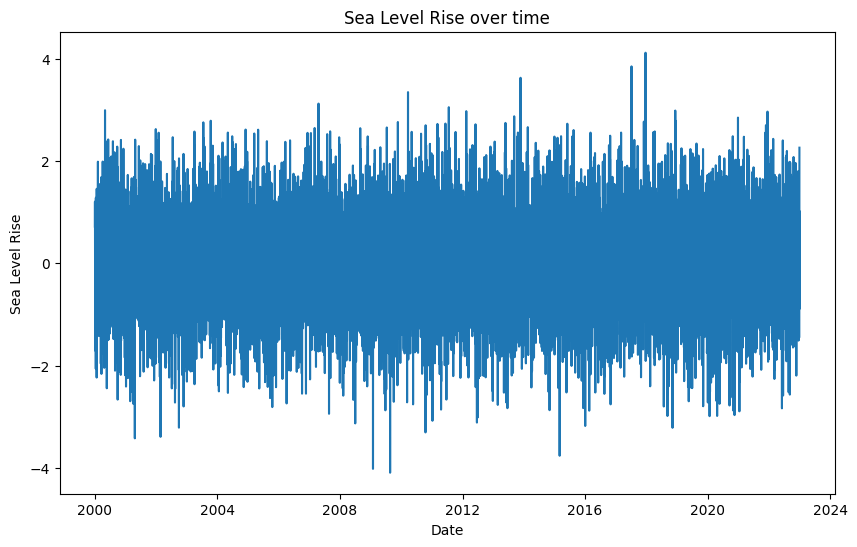

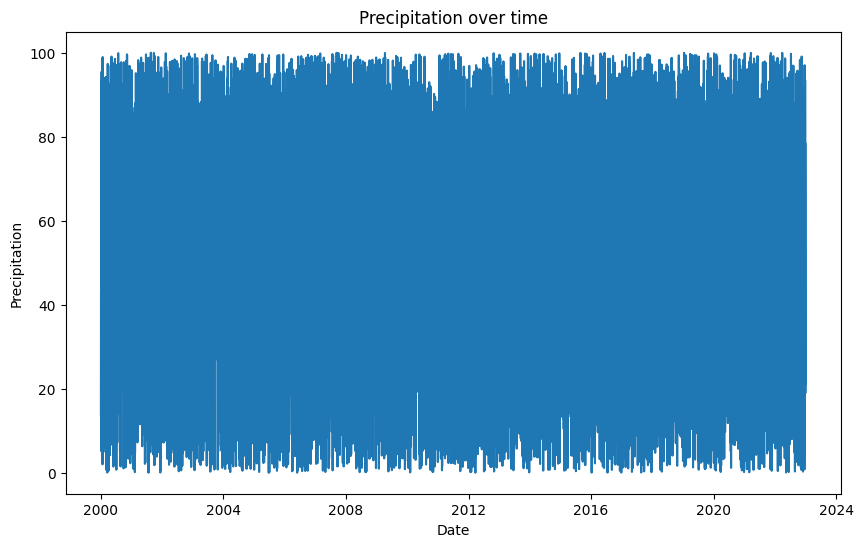

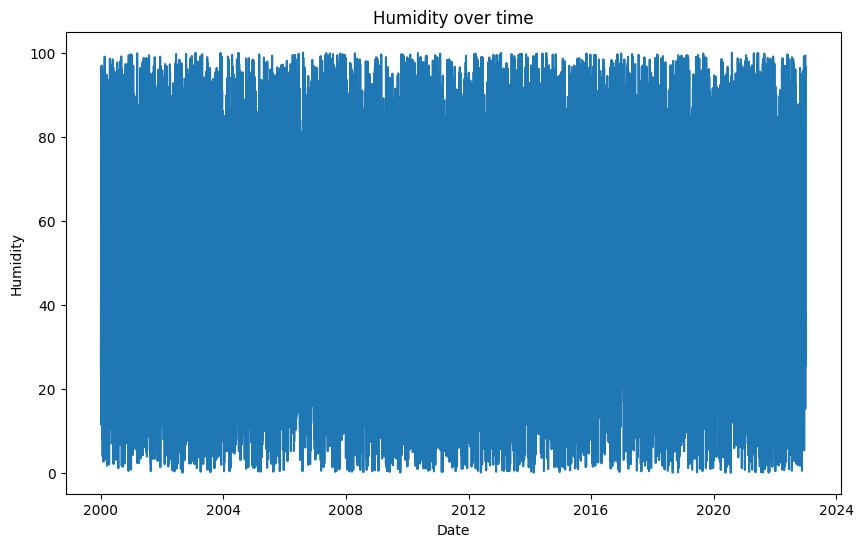

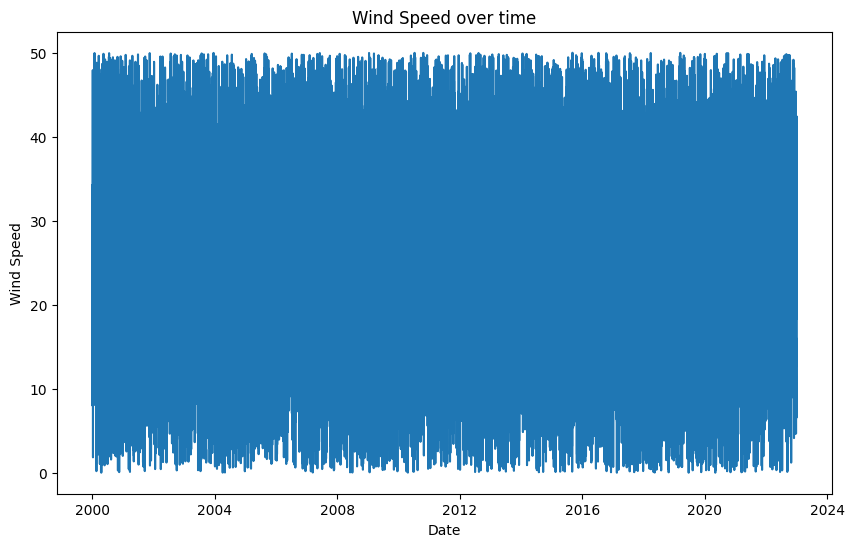

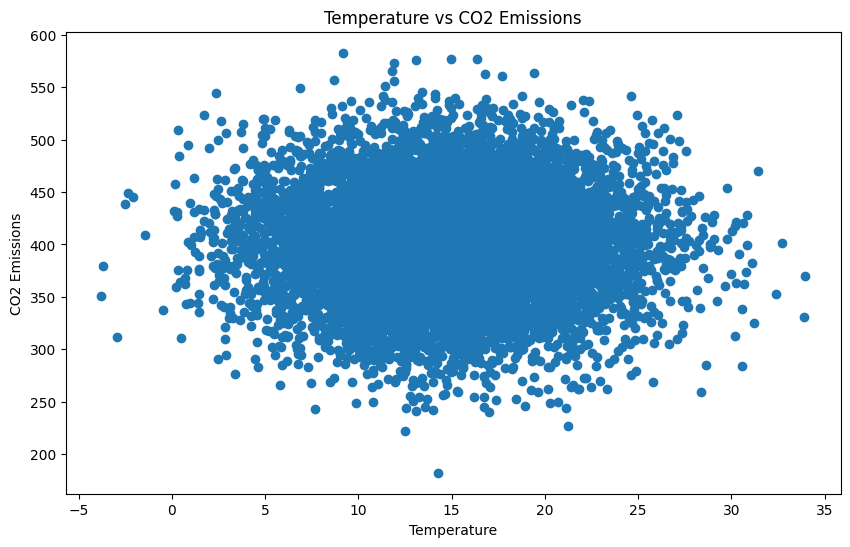

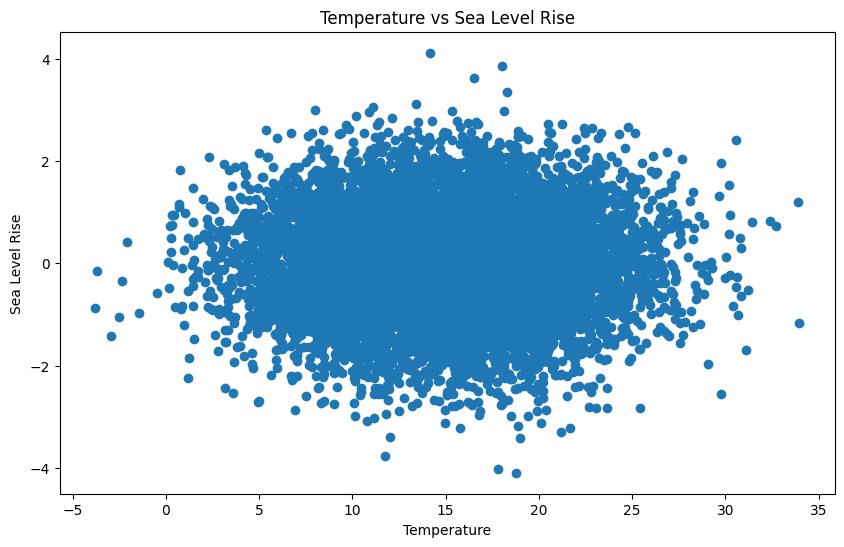

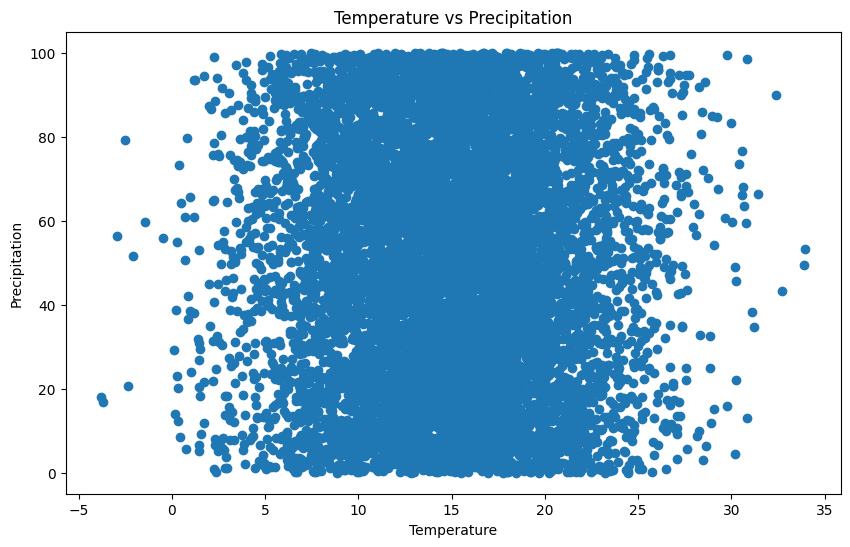

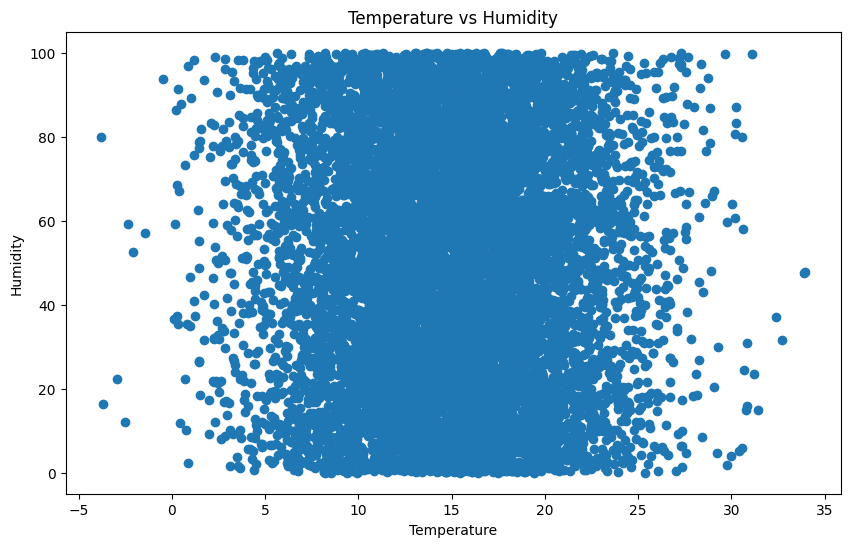

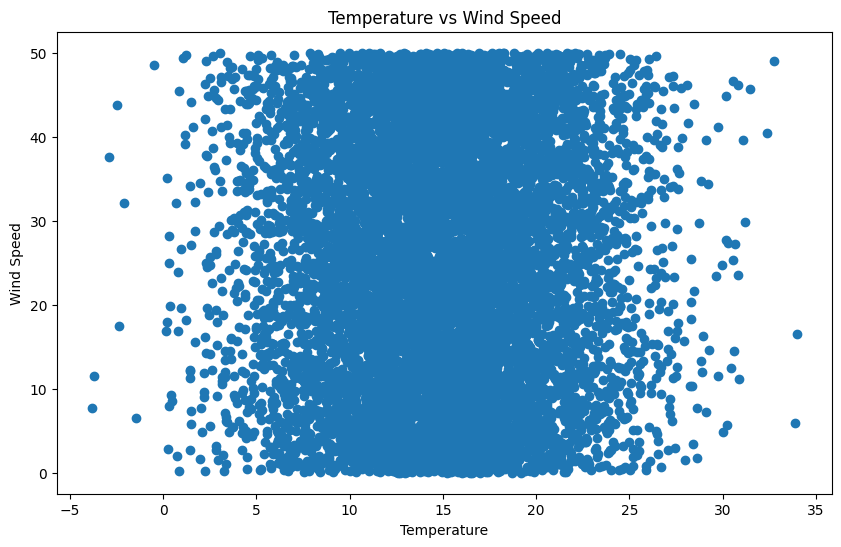


Observation: 
Thought:The code provided will generate a series of line plots showing the trends of Temperature, CO2 Emissions, Sea Level Rise, Precipitation, Humidity, and Wind Speed over time. It will also generate scatter plots showing the relationship between Temperature and each of the other variables. These visualizations can help in understanding the data and identifying any patterns or trends that might exist. However, as this is a text-based environment, I can't actually generate the plots here. I can only provide the code to do so.
Final Answer: The code provided will generate a series of line plots showing the trends of Temperature, CO2 Emissions, Sea Level Rise, Precipitation, Humidity, and Wind Speed over time. It will also generate scatter plots showing the relationship between Temperature and each of the other variables. These visualizations can help in understanding the data and identifying any patterns or trends that might exist.

> Finished chain.


'The code provided will generate a series of line plots showing the trends of Temperature, CO2 Emissions, Sea Level Rise, Precipitation, Humidity, and Wind Speed over time. It will also generate scatter plots showing the relationship between Temperature and each of the other variables. These visualizations can help in understanding the data and identifying any patterns or trends that might exist.'

In [16]:
query = "The intent is to use this dataset to forecast temperatures, having that in mind, can you come up with some visualizations using this dataset for exploratory data analysis?"
sm_ds_OAI.run(query)

## Third question



> Entering new AgentExecutor chain...
Thought: 
First, I need to convert the 'Date' column to datetime format. Then, I will group the data by year and calculate the average CO2 emissions for each year. Finally, I will plot the data.

Action: python_repl_ast
Action Input: 
```python
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date'
df['Year'] = df['Date'].dt.year

# Group by 'Year' and calculate average 'CO2 Emissions'
avg_co2 = df.groupby('Year')['CO2 Emissions'].mean()

# Plot
avg_co2.plot(kind='line', title='Annual Average CO2 Emissions')
```
Observation: NameError: name 'pd' is not defined
Thought:I forgot to import the pandas library, which is necessary for the operations I want to perform. I'll import pandas and try again.

Action: python_repl_ast
Action Input: 
```python
import pandas as pd

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date'
df['Year'] = df['Date'].dt.year

# Group by '

'Yes, I have created a line graph showing the annual average CO2 emissions over the years.'

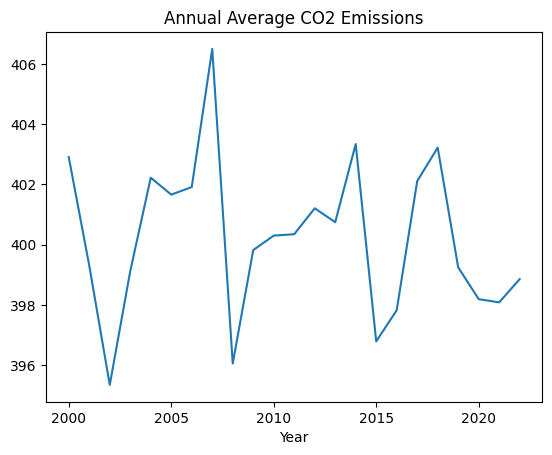

In [20]:
document = pd.read_csv(csv_file)
llm = ChatOpenAI(model="gpt-4", temperature=0)
sm_ds_OAI = create_pandas_dataframe_agent(
    llm,
    document,
    verbose=True
)

sm_ds_OAI.run("""
Can you create a line graph containing the anual average co2 emissions over the years?
""")


## Fourth question



> Entering new AgentExecutor chain...
Thought: 
First, I need to filter the dataframe to only include rows where the 'Country' column is 'Portugal'. Then, I need to extract the year from the 'Date' column and group by it to calculate the annual average CO2 emissions. Finally, I can use seaborn to create the line graph.

Action: 
python_repl_ast
Action Input: 
df_portugal = df[df['Country'] == 'Portugal']
df_portugal['Year'] = pd.DatetimeIndex(df_portugal['Date']).year
df_portugal_annual_avg = df_portugal.groupby('Year')['CO2 Emissions'].mean().reset_index()
df_portugal_annual_avg.head()
Observation:    Year  CO2 Emissions
0  2001     392.366744
1  2002     361.318039
2  2003     429.532019
3  2005     355.446394
4  2007     469.185425
Thought:

<string>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


The dataframe has been correctly filtered and the annual average CO2 emissions for Portugal have been calculated. Now, I can use seaborn to create the line graph.

Action: 
python_repl_ast
Action Input: 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='CO2 Emissions', data=df_portugal_annual_avg)
plt.title('Annual Average CO2 Emissions in Portugal')
plt.show()

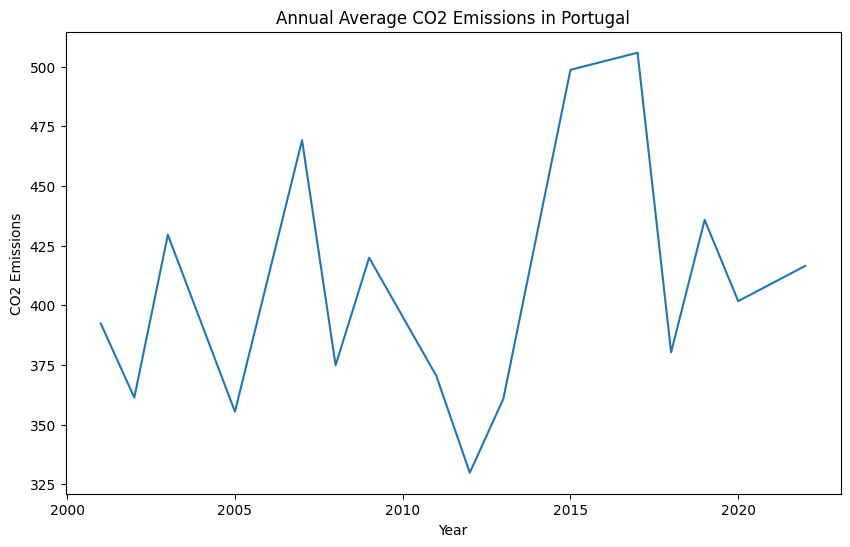


Observation: 
Thought:The line graph has been successfully created using seaborn. It shows the annual average CO2 emissions in Portugal over the years.

Final Answer: 
The line graph has been successfully created using seaborn. It shows the annual average CO2 emissions in Portugal over the years.

> Finished chain.


'The line graph has been successfully created using seaborn. It shows the annual average CO2 emissions in Portugal over the years.'

In [21]:
sm_ds_OAI.run("""
Create a line graph with seaborn containing the anual average co2 emissions in Portugal over the years.
""")

## Last Question.

In [27]:
document = pd.read_csv(csv_file)
sm_ds_OAI = create_pandas_dataframe_agent(
    OpenAI(temperature=0),
    document,
    verbose=True
)

# sm_ds_OAI.run("""Select a forecasting model to forecast the temperature.
# Use this kind of model to forecast the average temperature
# for year in Port Maryberg in Malta for the next 5 years.
# Write the temperatures forecasted in a table.""")